Names: Philipp Köhler, Alexander Bespalov


In [5]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression

## 1 Regularzation and Intercept

### a) 
The loss function with ridge regularization on $\boldsymbol{\beta}$ is:

$$
L(\boldsymbol{\beta})=\sum_{i=1}^n\left(y_i-\beta_0-\beta_1 x_{1 i}-\beta_2 x_{2 i}\right)^2+\lambda\|\boldsymbol{\beta}\|_2^2
$$

where:

$$
\|\boldsymbol{\beta}\|_2^2=\beta_0^2+\beta_1^2+\beta_2^2 .
$$

The regularization term $\lambda\|\beta\|_2^2$ applies equally to all parameters, including the intercept $\beta_0$. This penalization will drive $\beta_0$ towards zero as $\lambda$ increases, which can distort the model's fit by shrinking the intercept.

### b)
To avoid regularizing the intercept $\beta_0$, we modify the loss function so that only $\beta_1$ and $\beta_2$ are penalized:

$$
L(\boldsymbol{\beta})=\sum_{i=1}^n\left(y_i-\beta_0-\beta_1 x_{1 i}-\beta_2 x_{2 i}\right)^2+\lambda\left(\beta_1^2+\beta_2^2\right) .
$$


In this formulation, $\beta_0$ is excluded from the regularization term. In general, this would mean that the sum of the L2 norm starts for $i = 1$ instead of $i = 0$.

## c)

For equal penalization the contur shape must be a sphere. If $\beta_0$ is not regularized, the shape will be cylindrical, with equal confinment only for $\beta_1$ and $\beta_2$.

## 2 $\sigma^2$ Estimation

### a)

Because $y_n$ is assumed to be normally distributed with mean $\boldsymbol{\beta}^T \mathbf{x}_n$ and variance $\sigma^2$, the probability density function for $y_n$ given $\boldsymbol{\beta}$ and $\sigma^2$ is:

$$
p\left(y_n \mid \boldsymbol{\beta}, \sigma^2\right)=\frac{1}{\sqrt{2 \pi \sigma^2}} \exp \left(-\frac{\left(y_n-\boldsymbol{\beta}^T \mathbf{x}_n\right)^2}{2 \sigma^2}\right) .
$$

Given $N$ independent observations, the likelihood is the product of the individual likelihoods:

$$
L(\boldsymbol{\beta})=\prod_{n=1}^N p\left(y_n \mid \boldsymbol{\beta}, \sigma^2\right)
$$


Taking the logarithm of the likelihood:

$$
\log L(\boldsymbol{\beta})=\sum_{n=1}^N \log p\left(y_n \mid \boldsymbol{\beta}, \sigma^2\right)
$$
Substitute $p\left(y_n \mid \boldsymbol{\beta}, \sigma^2\right)$ into the log-likelihood:

$$
\log L(\boldsymbol{\beta})=\sum_{n=1}^N\left(-\frac{1}{2} \log \left(2 \pi \sigma^2\right)-\frac{\left(y_n-\beta^T \mathbf{x}_n\right)^2}{2 \sigma^2}\right) .
$$


So we get:

$$
\log L(\boldsymbol{\beta})=-\frac{N}{2} \log \left(2 \pi \sigma^2\right)-\frac{1}{2 \sigma^2} \sum_{n=1}^N\left(y_n-\boldsymbol{\beta}^T \mathbf{x}_n\right)^2
$$

Maximizing $\log L(\boldsymbol{\beta})$ is equivalent to maximizing the following equation as the constant addition it independent of $\beta$:

$$
-\frac{1}{2 \sigma^2} \sum_{n=1}^N\left(y_n-\beta^T \mathbf{x}_n\right)^2 .
$$

So the final objective is:
$$
\hat{\boldsymbol{\beta}}=\underset{\boldsymbol{\beta}}{\arg \min } \frac{1}{2 \sigma^2} \sum_{n=1}^N\left(y_n-\boldsymbol{\beta}^T \mathbf{x}_n\right)^2 .
$$
Which in vector notation can be written as
$$
\hat{\boldsymbol{\beta}}=\frac{1}{2 \sigma^2}\underset{\boldsymbol{\beta}}{\arg \min }(\mathbf{y}-\mathbf{X} \boldsymbol{\beta})^T(\mathbf{y}-\mathbf{X} \boldsymbol{\beta}) .
$$

Which is, besides the constant factor of $\frac{1}{2 \sigma^2}$, the same minimization problem as for the SSQ formulation. Therefore, the same solution follows.
$$
\hat{\beta} = (X^T X)^{-1} X^T y
$$

### b)
As derived in a) we can write the log-likelyhood as:
$$
\log L=-\frac{N}{2} \log \left(2 \pi \sigma^2\right)-\frac{1}{2 \sigma^2} \sum_{n=1}^N\left(y_n-\boldsymbol{\beta}^T \mathbf{x}_n\right)^2
$$
Maximizing this with respect to $\sigma^2$:
$$
\frac{d}{d \sigma^2} \log L\left(\sigma^2\right)=-\frac{N}{2 \sigma^2}+\frac{1}{2\left(\sigma^2\right)^2} \sum_{n=1}^N\left(y_n-\hat{\boldsymbol{\beta}}^T \mathbf{x}_n\right)^2=0 .
$$
And rearanging for $\sigma^2$ yields:
$$
\hat{\sigma}^2=\frac{1}{N} \sum_{n=1}^N\left(y_n-\hat{\boldsymbol{\beta}}^T \mathbf{x}_n\right)^2 .
$$
Which is the average of the squared resiudials:
$$
\hat{\sigma}^2=\frac{\mathrm{SSQ}}{N}
$$

## 3 Visualize Regularization Contours

x.shape: (2, 100), "y.shape:" (1, 100)


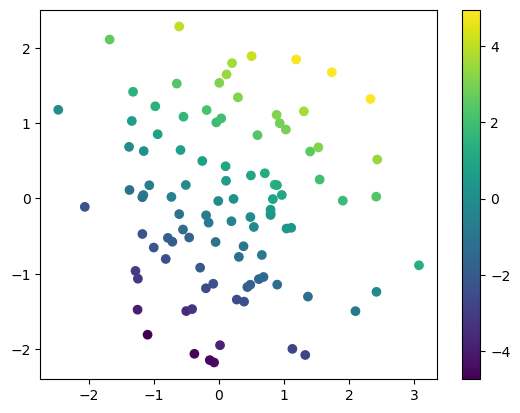

In [6]:
# load the data
data = np.load('data/linreg.npz')
x = data['X']
y = data['Y']
print(f'x.shape: {x.shape}, "y.shape:" {y.shape}')
plt.scatter(*x, c=y);
plt.colorbar()
plt.show()

In [41]:
# create a grid of points in the parameter space
b1, b2 = np.linspace(-1, 3, 101), np.linspace(-1, 3, 101)
bs = np.stack(np.meshgrid(b1, b2, indexing='ij'), axis=-1)
bs.shape

(101, 101, 2)

### (a)

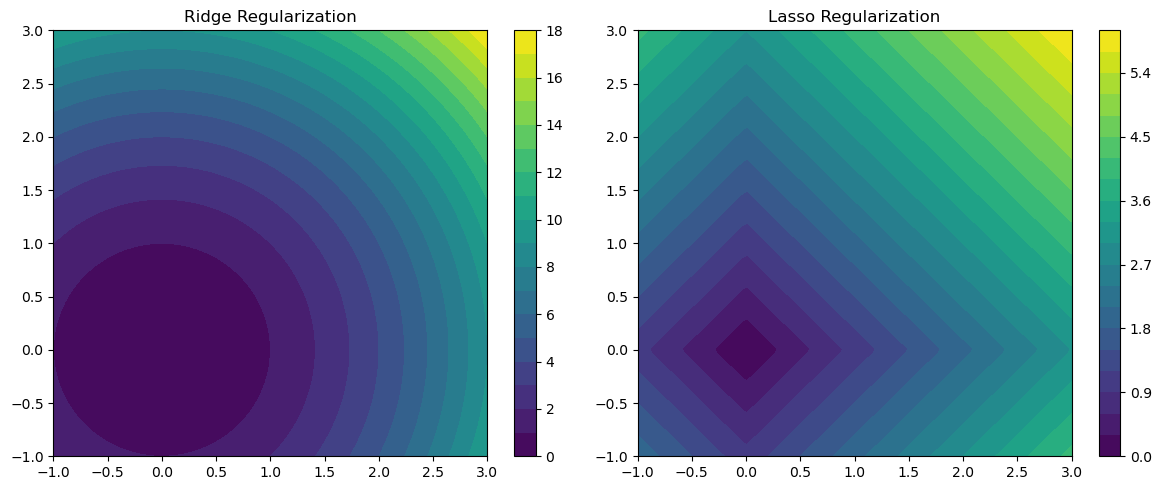

In [42]:
beta1 = np.linspace(-1, 3, 100)
beta2 = np.linspace(-1, 3, 100)
beta1_grid, beta2_grid = np.meshgrid(beta1, beta2)

# Ridge regularization term
lambda_ridge = 1 
ridge_regularization = lambda_ridge * (beta1_grid**2 + beta2_grid**2)

#Lasso regularization term
lambda_lasso = 1
lasso_regularization = lambda_lasso * (np.abs(beta1_grid) + np.abs(beta2_grid))

# Plot 
plt.figure(figsize=(12, 5))

# Ridge plot
plt.subplot(1, 2, 1)
cp_ridge = plt.contourf(beta1_grid, beta2_grid, ridge_regularization, 20, cmap='viridis')
plt.colorbar(cp_ridge)
plt.title('Ridge Regularization')

# Lasso plot
plt.subplot(1, 2, 2)
cp_lasso = plt.contourf(beta1_grid, beta2_grid, lasso_regularization, 20, cmap='viridis')
plt.colorbar(cp_lasso)
plt.title('Lasso Regularization')

plt.tight_layout()
plt.show()


### (b)

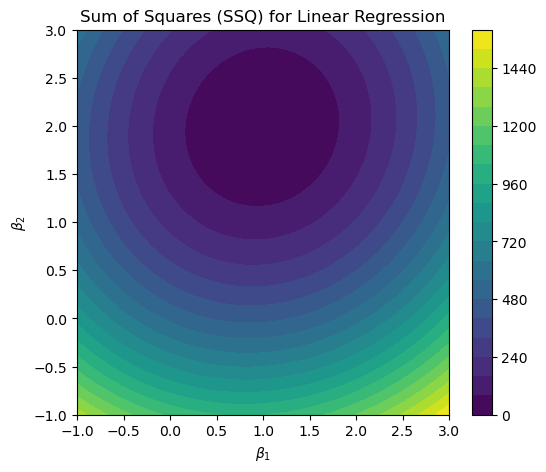

In [43]:
y = y.flatten()  # Flatten y to match shape (100,)

# Compute the SSQ for each pair (beta1, beta2)
ssq = np.zeros_like(beta1_grid)
for i in range(beta1_grid.shape[0]):
    for j in range(beta1_grid.shape[1]):
        beta1_val = beta1_grid[i, j]
        beta2_val = beta2_grid[i, j]
        y_pred = beta1_val * x[0, :] + beta2_val * x[1, :]
        ssq[i, j] = np.sum((y - y_pred) ** 2)

# Plot the SSQ as a contour plot
plt.figure(figsize=(6, 5))
cp_ssq = plt.contourf(beta1_grid, beta2_grid, ssq, 20, cmap='viridis')
plt.colorbar(cp_ssq)
plt.title('Sum of Squares (SSQ) for Linear Regression')
plt.xlabel(r'$\beta_1$')
plt.ylabel(r'$\beta_2$')
plt.show()


### (c)

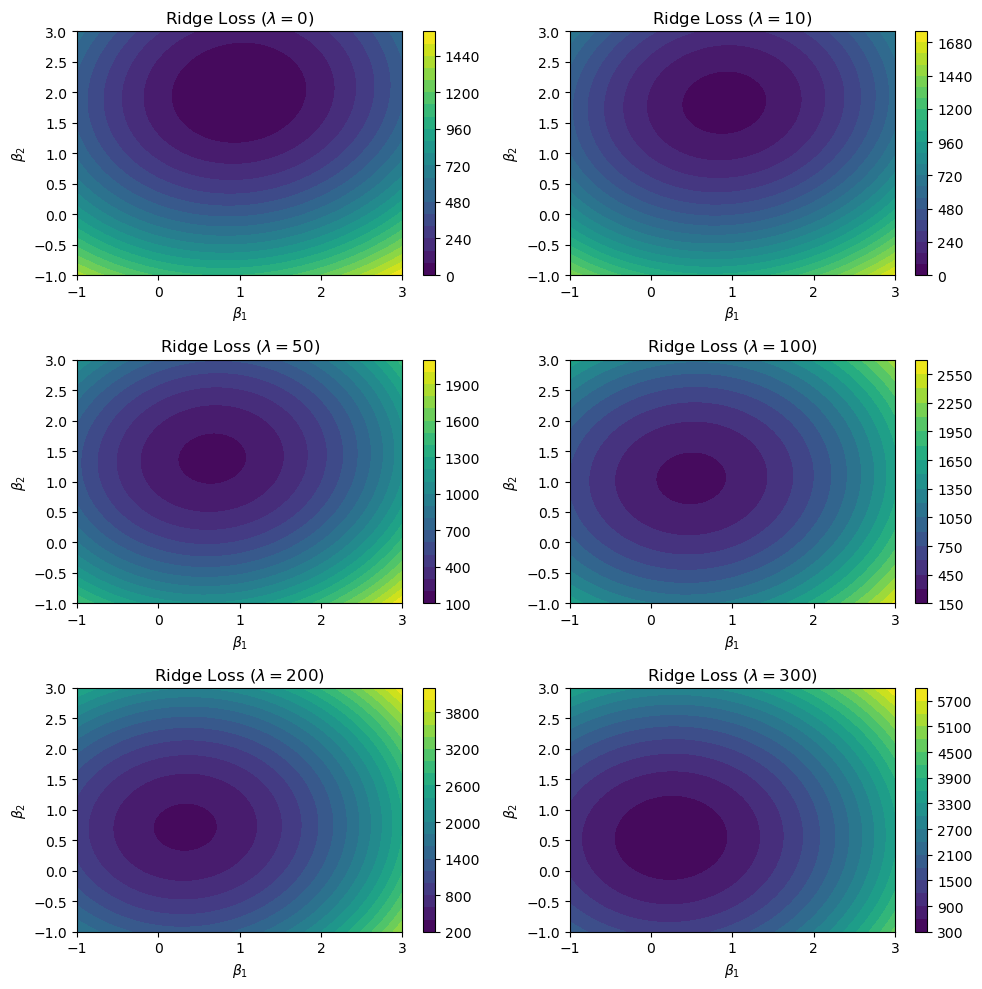

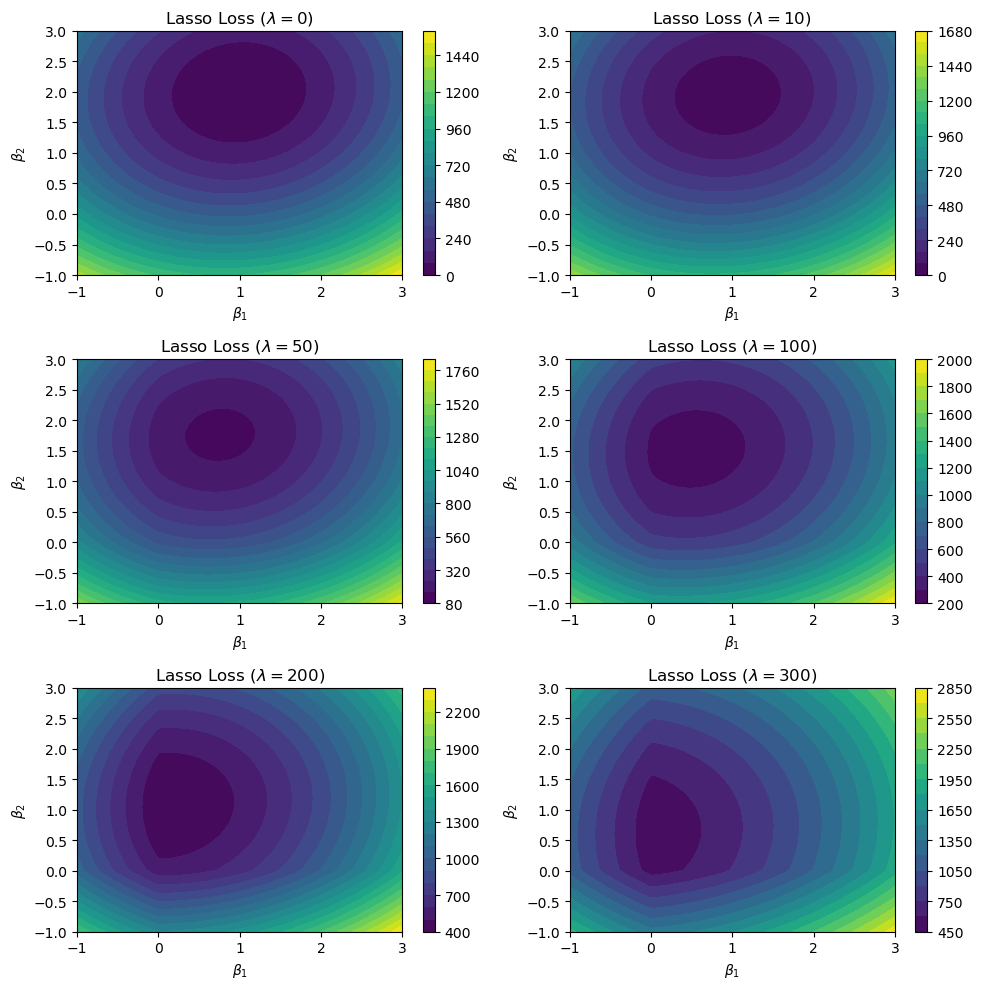

In [ ]:
# Lambda values for Ridge and Lasso
lambda_values = [0, 10, 50, 100, 200, 300]

# Plot Ridge and Lasso Loss functions for different lambda values
plt.figure(figsize=(10, 10))

for idx, lambda_val in enumerate(lambda_values, start=1):
    ridge_loss = ssq + lambda_val * (beta1_grid**2 + beta2_grid**2)
    
    # Ridge Loss
    plt.subplot(3, 2, idx)
    cp_ridge_loss = plt.contourf(beta1_grid, beta2_grid, ridge_loss, 20, cmap='viridis')
    plt.colorbar(cp_ridge_loss)
    plt.title(f'Ridge Loss ($\\lambda={lambda_val}$)')
    plt.xlabel(r'$\beta_1$')
    plt.ylabel(r'$\beta_2$')
    
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 10))

for idx, lambda_val in enumerate(lambda_values, start=1):
    lasso_loss = ssq + lambda_val * (np.abs(beta1_grid) + np.abs(beta2_grid))
    
    # Lasso Loss
    plt.subplot(3, 2, idx)
    cp_lasso_loss = plt.contourf(beta1_grid, beta2_grid, lasso_loss, 20, cmap='viridis')
    plt.colorbar(cp_lasso_loss)
    plt.title(f'Lasso Loss ($\\lambda={lambda_val}$)')
    plt.xlabel(r'$\beta_1$')
    plt.ylabel(r'$\beta_2$')

plt.tight_layout()
plt.show()


**Ridge Loss**: As $\lambda$ increases, the solution becomes more penalized towards smaller values of $\beta$, shrinking the coefficients. However the loss is smallest for $\lambda = 0$, and becomes larger the larger $\lambda$.
**Lasso Loss**: The same holds for the lasso loss. Additionaly, for larger $\lambda$, one can observe the coefficients to become zero leading to sparsity in the feature space.

## 4 CT Reconstruction

First, set up the design matrix. (Run this once to save it to the disk)

In [7]:
# create design matrix
# don't change any of this, just run it once to create and save the design matrix
import os

n_parallel_rays = 70 
n_ray_angles = 30
res = (99, 117)
print("Number of pixels in the 2d image:", np.prod(res))
print("Total number of rays:", n_parallel_rays * n_ray_angles)

def rot_mat(angle):
    c, s = np.cos(angle), np.sin(angle)
    return np.stack([np.stack([c, s], axis=-1), np.stack([-s, c], axis=-1)], axis=-1)

kernel = lambda x: np.exp(-x**2/sigma**2/2)

if not os.path.exists('data/design_matrix.npy'):
    xs = np.arange(0, res[1]+1) - res[1]/2 # np.linspace(-1, 1, res[1] + 1)
    ys = np.arange(0, res[0]+1) - res[0]/2 # np.linspace(-1, 1, res[0] + 1)

    # rays are defined by origin and direction
    ray_offset_range = [-res[1]/1.5, res[1]/1.5]
    n_rays = n_parallel_rays * n_ray_angles

    ray_angles = np.linspace(0, np.pi, n_ray_angles, endpoint=False) + np.pi/n_ray_angles

    # offsets for ray_angle = 0, i.e. parallel to x-axis
    ray_0_offsets = np.stack([np.zeros(n_parallel_rays), np.linspace(*ray_offset_range, n_parallel_rays)], axis=-1)
    ray_0_directions = np.stack([np.ones(n_parallel_rays), np.zeros(n_parallel_rays)], axis=-1)

    

    ray_rot_mats = rot_mat(ray_angles)

    ray_offsets = np.einsum('oi,aij->aoj', ray_0_offsets, ray_rot_mats).reshape(-1, 2)
    ray_directions = np.einsum('oi,aij->aoj', ray_0_directions, ray_rot_mats).reshape(-1, 2)

    sigma = 1
    xsc = (xs[1:] + xs[:-1]) / 2
    ysc = (ys[1:] + ys[:-1]) / 2
    b = np.stack(np.meshgrid(xsc, ysc), axis=-1).reshape(-1, 2)
    a = ray_offsets
    v = ray_directions
    v = v / np.linalg.norm(v, axis=-1, keepdims=True)
    p = ((b[None] - a[:, None]) * v[:, None]).sum(-1, keepdims=True) * v[:, None] + a[:, None]
    d = np.linalg.norm(b - p, axis=-1)
    d = kernel(d)
    design_matrix = d.T

    np.save('data/design_matrix.npy', design_matrix)
    print(f'created and saved design matrix of shape {design_matrix.shape} at data/design_matrix.npy')

Number of pixels in the 2d image: 11583
Total number of rays: 2100


sino shape: (1, 2100)


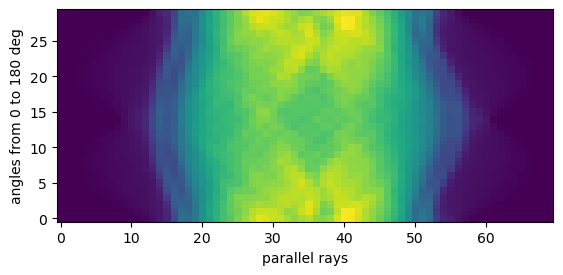

In [8]:
sino = np.load('data/sino.npy')

print(f'sino shape: {sino.shape}')

# visualize sinogram as image
n_parallel_rays = 70
n_angles = 30
plt.imshow(sino.reshape(n_angles, n_parallel_rays), origin='lower')
# plt.colorbar()
plt.xlabel('parallel rays')
plt.ylabel('angles from 0 to 180 deg')
plt.show();

### (a)

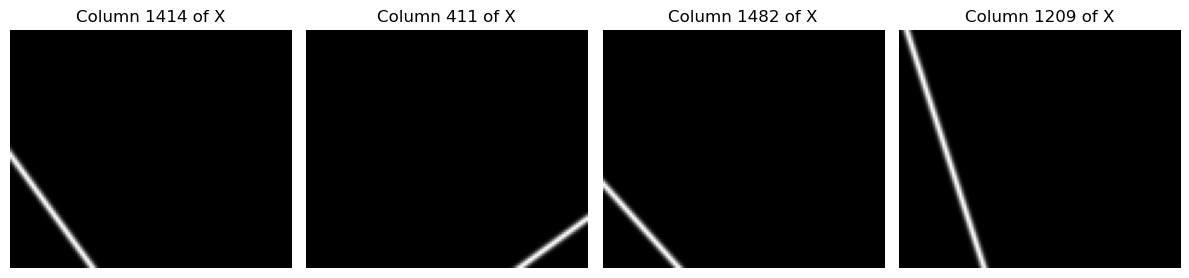

In [4]:
design_matrix = np.load('data/design_matrix.npy')

# TODO: visualize four random columns as images, using an image shape of (99, 117)

def visualize_columns_as_images(X, num_columns=4, image_shape=(99, 117)):
    fig, axes = plt.subplots(1, num_columns, figsize=(12, 5))
    selected_columns = np.random.choice(X.shape[1], num_columns, replace=False) 
    
    for i, col_idx in enumerate(selected_columns):
        column_as_image = X[:, col_idx].reshape(image_shape)
        axes[i].imshow(column_as_image, cmap='gray')
        axes[i].set_title(f"Column {col_idx + 1} of X")
        axes[i].axis('off')
        
    plt.tight_layout()
    plt.show()

visualize_columns_as_images(design_matrix, num_columns=4, image_shape=(99, 117))

A column of X can be interpreted as the influece of each pixel on the corresponding detector at the corresponding angle to the column. In other words a column describes a ray of a detector at an angle corresponding to the column through the image.

### (b)

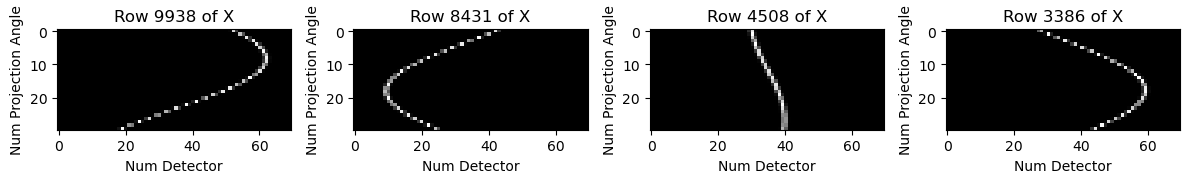

In [5]:
# TODO: visualize four random rows as images, using an images

def visualize_rows_as_images(X, num_rows=4, image_shape=(30, 70)): # 30 num angles, 70 num detectors
    fig, axes = plt.subplots(1, num_rows, figsize=(12, 5))
    selected_rows = np.random.choice(X.shape[0], num_rows, replace=False) 
    
    for i, row_idx in enumerate(selected_rows):
        row_as_image = X[row_idx, :].reshape(image_shape)
        axes[i].imshow(row_as_image, cmap='gray')
        axes[i].set_title(f"Row {row_idx + 1} of X")
        
        axes[i].set_ylabel('Num Projection Angle')
        axes[i].set_xlabel('Num Detector')
        
    plt.tight_layout()
    plt.show()

visualize_rows_as_images(design_matrix, num_rows=4, image_shape=(30, 70))

A row of X can be interpreted as the influence of the pixel corresponding to the row on all detectors at all angles.

### (c)

In [27]:
# TODO: solve the reconstruction with linear regression and visualize the result
X = design_matrix
Y = sino


In [34]:
I = Y @ X.T @ np.linalg.inv(X @ X.T)

<function matplotlib.pyplot.show(close=None, block=None)>

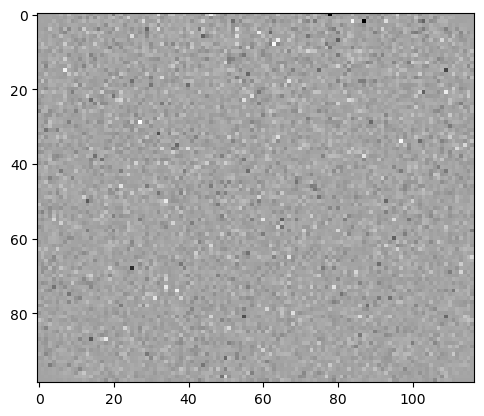

In [35]:
plt.imshow(I.reshape((99, 117)), cmap='gray')
plt.show

In [29]:
I = (np.linalg.inv(X @ X.T) @ X @ Y.T).T

<function matplotlib.pyplot.show(close=None, block=None)>

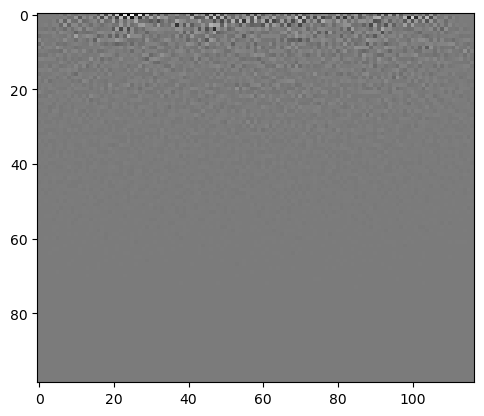

In [32]:
plt.imshow(I.reshape((99, 117)), cmap='gray')
plt.show

Linear regression using the derived formula does not work. Therefore try the sklearn module.

In [ ]:
linear_reg = LinearRegression()
linear_reg.fit(X.T, Y.T)
I = linear_reg.coef_.T

<function matplotlib.pyplot.show(close=None, block=None)>

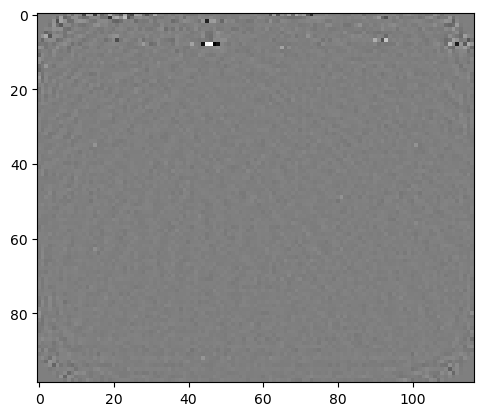

In [37]:
plt.imshow(I.reshape((99, 117)), cmap='gray')
plt.show

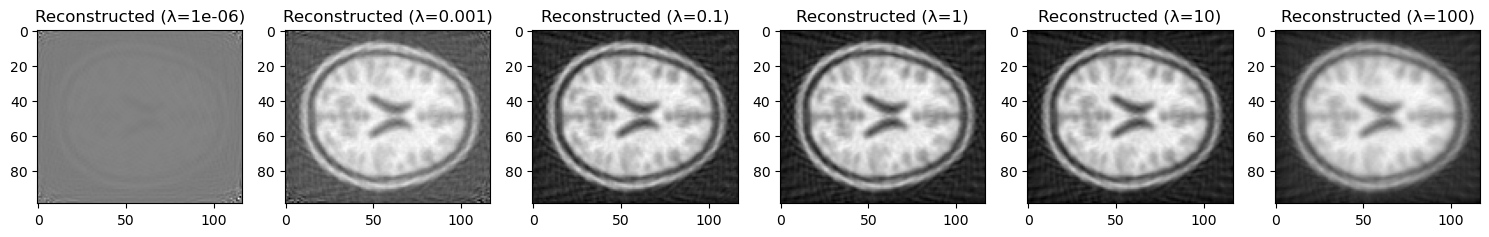

In [50]:
# TODO: solve the reconstruction with ridge regression and visualize the result
# Optional: try out different regularization strengths and oberve the influence
from sklearn.linear_model import Ridge

lambdas = [0.000001, 0.001, 0.1, 1, 10, 100]
reconstructed_images = []
for lam in lambdas:
    ridge = Ridge(alpha=lam)
    ridge.fit(X.T, Y.T) 
    reconstructed_image = ridge.coef_.T
    reconstructed_images.append(reconstructed_image.reshape((99, 117)))

fig, axes = plt.subplots(1, len(lambdas), figsize=(15, 8))

for i, lam in enumerate(lambdas):
    axes[i].imshow(reconstructed_images[i], cmap='gray')
    axes[i].set_title(f'Reconstructed (λ={lam})')

plt.tight_layout()
plt.show()

The problem is solvable by ridge regression and not by linear regression. Linear regression overfits as it is the case with $\lambda = 0.000001$. Further for $\lambda = 1$ and $\lambda = 0.1$ the image is the sharpest.

## 5 Bonus: X-Ray Free-Electron Lasers

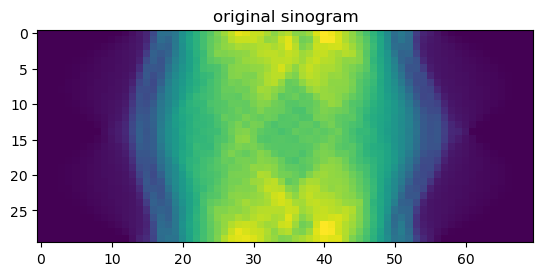

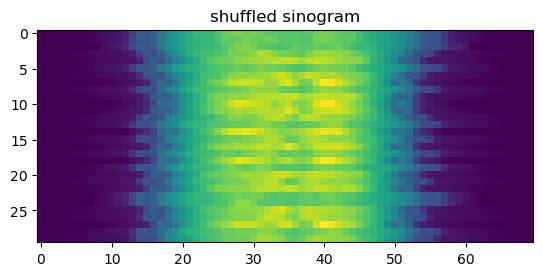

In [9]:
sino = np.load('data/sino.npy').reshape(n_angles, n_parallel_rays)
plt.imshow(sino)
plt.title('original sinogram')
plt.show()

order = np.arange(n_angles)
np.random.shuffle(order)
sino_shuffled = sino[order]
plt.imshow(sino_shuffled)
plt.title('shuffled sinogram')
plt.show()

The Idea is to look at the cross-correlations of the angles and sort them such that the measurements with the highest cross-correlation are next to each other.

C:\Users\sasch\AppData\Local\Temp\ipykernel_6528\702815082.py:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  correlation_matrix[i,j] = corr


[0, np.int64(14), np.int64(10), np.int64(18), np.int64(27), np.int64(7), np.int64(16), np.int64(11), np.int64(9), np.int64(22), np.int64(20), np.int64(4), np.int64(25), np.int64(6), np.int64(26), np.int64(12), np.int64(21), np.int64(15), np.int64(3), np.int64(29), np.int64(8), np.int64(17), np.int64(28), np.int64(13), np.int64(19), np.int64(5), np.int64(1), np.int64(24), np.int64(23), np.int64(2), np.int64(0)]


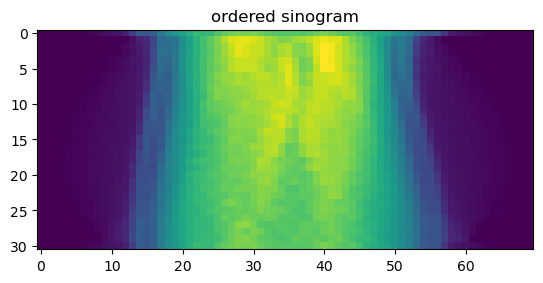

In [60]:
def make_correlation_matrix(sino):
    num_angles = sino.shape[0]
    correlation_matrix = np.empty((num_angles,num_angles))

    for i in range(num_angles):
        for j in range(num_angles):
            corr = np.correlate(sino[i],sino[j])
            correlation_matrix[i,j] = corr
    return correlation_matrix

def order_sino(sino):
    num_angles = sino.shape[0]

    correlation_matrix = make_correlation_matrix(sino)

    order = []
    order.append(0) #append first sino to order it is arbitrary
    for i in range(num_angles):
        row = correlation_matrix[order[-1]] #compare to last added angle use therefore corresponding row
        row[order] = -np.inf #exclude angles that are already in the order
        next_sino = np.argmax(row)
        order.append(next_sino)
    print(order)
    ordered_sino = sino[order]

    return ordered_sino

ordered_sino = order_sino(sino_shuffled)

plt.imshow(ordered_sino)
plt.title('ordered sinogram')
plt.show()

The first angle seems to be off compared to the second angle. Choosing different starting angles leads suprisingly always to the 10th or 14th angle as the next one. The cross-correlations seems to be a valid but not perfect metric. Finetuning of it could improve the method.